<a href="https://colab.research.google.com/github/JohnLucas22/Stock_Price_Prediction_Model-Python-/blob/main/Apple_Stock_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses an artificial recurrent nuearl network called Long Short Term Memory
#             to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
!pip install yfinance

In [ ]:
# Import Libraries
import math
import pandas_datareader as web
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
print('Complete')


In [13]:
#get the stock quote
df = yf.download('AAPL',
                      start='2012-01-01',
                      end='2021-06-12',
                      progress=False,
)
df.head()
#show the data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610313,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678083,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818840,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952842,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932296,394024400
...,...,...,...,...,...,...
2021-06-07,126.169998,126.320000,124.830002,125.900002,125.711655,71057600
2021-06-08,126.599998,128.460007,126.209999,126.739998,126.550392,74403800
2021-06-09,127.209999,127.750000,126.519997,127.129997,126.939812,56877900


In [14]:
# Get the number of rows and columns in the data set
df.shape

(2376, 6)

<function matplotlib.pyplot.show>

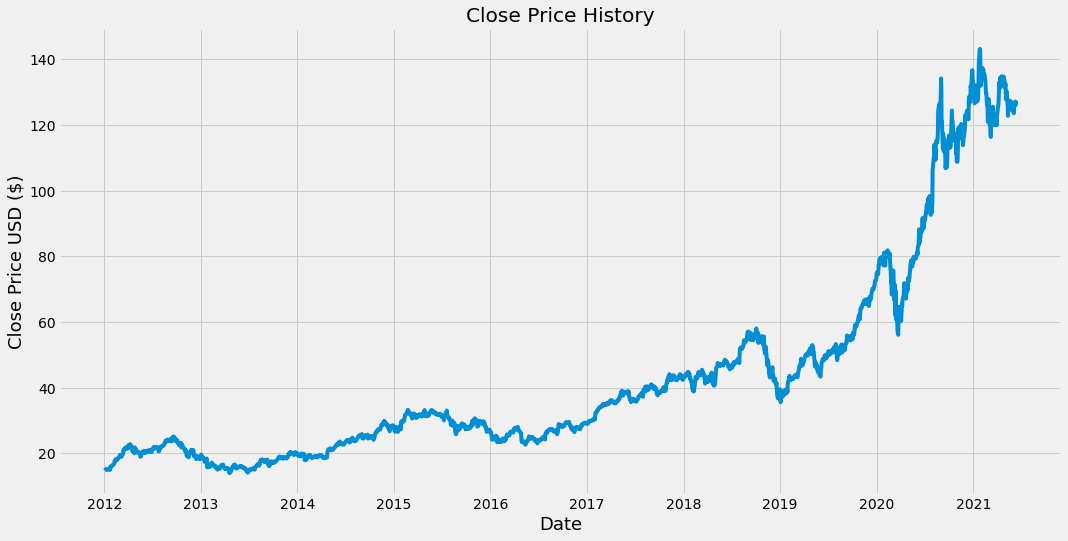

In [17]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [18]:
#create a new df with only the close column
data = df.filter(['Close'])
#convert the df to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

1901

In [32]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.87594075],
       [0.8680468 ],
       [0.87764338]])

In [21]:
#Create the training data set 
#create the scaled training data set 
train_data = scaled_date[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)): 
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [22]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
#reshape the data 
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1841, 60, 1)

In [28]:
#buidling the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
#complie the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1841/1841 [==============================] - 57s 29ms/step - loss: 2.2472e-04


In [33]:
#create the testing data set 
#create a new array containing scaled values from index 1841 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [34]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [35]:
#reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [39]:
#get the root mean squared error RMSE
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

4.683322529039885

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


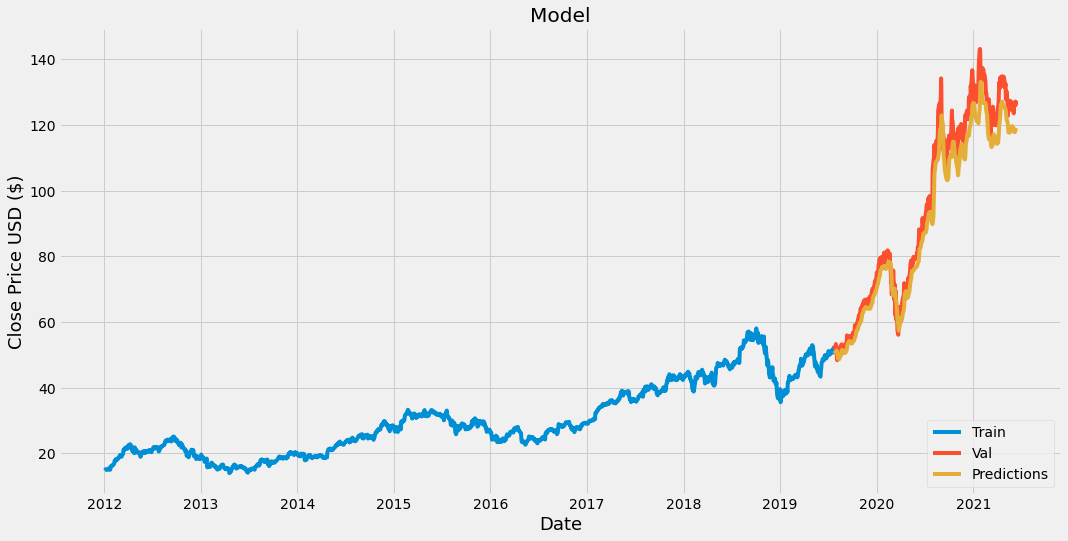

In [49]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()


In [52]:
#showing the valid(Actual) and predicted prices
valid

,Close,predictions
Date,,
2019-07-25,51.755001,50.438366
2019-07-26,51.935001,50.591335
2019-07-29,52.419998,50.702042
2019-07-30,52.195000,50.845371
2019-07-31,53.259998,50.946911
...,...,...
2021-06-07,125.900002,117.821808
2021-06-08,126.739998,117.933937
2021-06-09,127.129997,118.291626


In [66]:
#get the quote 
apple_quote = yf.download('AAPL',
                      start='2012-01-01',
                      end='2021-06-12',
                      progress=False,
#create a new data frame 
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values & convert df to array 
last_60_days = new_df[-60:].values
#scale the data to be between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array 
X_test = np.array(X_test)
#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scale price 
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

## should be getting predicted price for 2021-06-13

SyntaxError: ignored